In [1]:
import pandas as pd
import numpy as np

# -----------------------------
# SAMPLE SALES DATASET
# -----------------------------
data = {
    "date": pd.date_range(start="2024-01-01", periods=180, freq="D"),
    "book_title": np.random.choice(
        ["Data Science Handbook", "Python Study Guide", "Machine Learning Workbook"], 
        180
    ),
    "platform": np.random.choice(
        ["Amazon KDP", "IngramSpark", "Barnes & Noble"], 
        180
    ),
    "format": np.random.choice(
        ["Ebook", "Paperback", "Hardcover", "Audiobook"], 
        180
    ),
    "units_sold": np.random.poisson(lam=5, size=180),
    "price_per_unit": np.random.choice([9.99, 14.99, 24.99, 29.99], 180),
    "platform_fee_rate": np.random.choice([0.30, 0.40, 0.55], 180),
    "sales_rank": np.random.randint(500, 50000, 180),
    "page_views": np.random.randint(50, 1500, 180),
    "ad_spend": np.round(np.random.uniform(0, 25, 180), 2),
    "inventory_sent": np.random.randint(0, 20, 180),
    "reviews": np.random.randint(0, 5, 180),
    "average_rating": np.round(np.random.uniform(3.5, 4.8), 1),
    "country": np.random.choice(["US", "UK", "CA", "AU", "IN"], 180)
}

df = pd.DataFrame(data)


In [2]:
df["gross_revenue"] = df["units_sold"] * df["price_per_unit"]
df["royalties"] = df["gross_revenue"] * (1 - df["platform_fee_rate"])

core_metrics = df.groupby("book_title")[[
    "units_sold", "gross_revenue", "royalties"
]].sum()

core_metrics


,units_sold,gross_revenue,royalties
book_title,,,
Data Science Handbook,327,6891.73,4073.096
Machine Learning Workbook,283,5492.17,3310.559
Python Study Guide,265,4702.35,2803.913


In [3]:
sales_velocity = (
    df.groupby(["date", "book_title"])["units_sold"]
    .sum()
    .rolling(7)
    .mean()
)

sales_velocity.tail(10)


date        book_title               
2024-06-19  Data Science Handbook        5.571429
2024-06-20  Data Science Handbook        6.714286
2024-06-21  Python Study Guide           6.000000
2024-06-22  Data Science Handbook        6.428571
2024-06-23  Python Study Guide           5.857143
2024-06-24  Machine Learning Workbook    5.142857
2024-06-25  Machine Learning Workbook    5.714286
2024-06-26  Data Science Handbook        5.571429
2024-06-27  Data Science Handbook        4.285714
2024-06-28  Python Study Guide           4.714286
Name: units_sold, dtype: float64

<Axes: title={'center': 'Monthly Sales Seasonality'}, xlabel='Month', ylabel='Units Sold'>

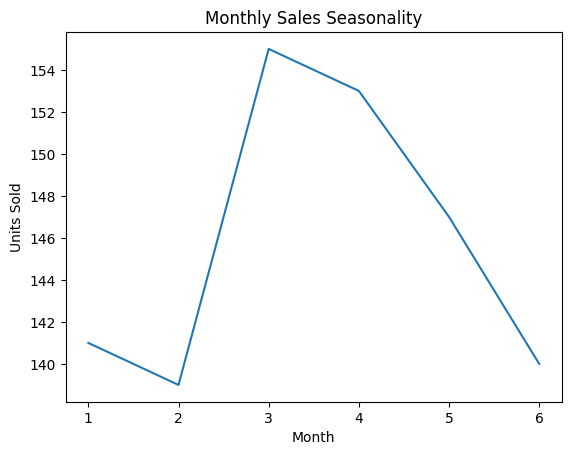

In [4]:
df["month"] = df["date"].dt.month

seasonality = df.groupby("month")["units_sold"].sum()

seasonality.plot(
    title="Monthly Sales Seasonality",
    ylabel="Units Sold",
    xlabel="Month"
)


In [5]:
competitor_analysis = df.groupby("book_title").agg({
    "price_per_unit": "mean",
    "average_rating": "mean",
    "reviews": "sum"
}).sort_values("average_rating", ascending=False)

competitor_analysis


,price_per_unit,average_rating,reviews
book_title,,,
Data Science Handbook,20.466190,4.3,136
Machine Learning Workbook,19.740000,4.3,129
Python Study Guide,18.060175,4.3,116


In [6]:
platform_performance = df.groupby("platform")["royalties"].sum()
platform_performance


platform
Amazon KDP        2426.2145
Barnes & Noble    3598.7185
IngramSpark       4162.6350
Name: royalties, dtype: float64

In [7]:
format_performance = df.groupby("format")[[
    "units_sold", "royalties"
]].sum()

format_performance


,units_sold,royalties
format,,
Audiobook,258,2946.5135
Ebook,172,1954.5215
Hardcover,240,3051.0125
Paperback,205,2235.5205


In [8]:
df["sell_through_rate"] = np.where(
    df["inventory_sent"] > 0,
    df["units_sold"] / df["inventory_sent"],
    np.nan
)

df[["book_title", "format", "sell_through_rate"]].dropna().head()


,book_title,format,sell_through_rate
0,Machine Learning Workbook,Audiobook,0.333333
1,Data Science Handbook,Hardcover,5.000000
2,Machine Learning Workbook,Paperback,0.571429
4,Data Science Handbook,Audiobook,0.545455
5,Data Science Handbook,Audiobook,0.214286


In [9]:
df["conversion_rate"] = df["units_sold"] / df["page_views"]

conversion_metrics = df.groupby("book_title")["conversion_rate"].mean()
conversion_metrics


book_title
Data Science Handbook        0.013204
Machine Learning Workbook    0.012871
Python Study Guide           0.013906
Name: conversion_rate, dtype: float64

In [10]:
df["marketing_roi"] = np.where(
    df["ad_spend"] > 0,
    (df["royalties"] - df["ad_spend"]) / df["ad_spend"],
    np.nan
)

df[["book_title", "marketing_roi"]].dropna().head()


,book_title,marketing_roi
0,Machine Learning Workbook,2.764435
1,Data Science Handbook,1.518857
2,Machine Learning Workbook,5.162329
3,Machine Learning Workbook,6.479144
4,Data Science Handbook,2.276503


In [11]:
dashboard = df.groupby(["date", "platform", "book_title"]).agg({
    "units_sold": "sum",
    "gross_revenue": "sum",
    "royalties": "sum"
}).reset_index()

dashboard.head()


,date,platform,book_title,units_sold,gross_revenue,royalties
0,2024-01-01,Amazon KDP,Machine Learning Workbook,4,119.96,71.9760
1,2024-01-02,IngramSpark,Data Science Handbook,5,74.95,33.7275
2,2024-01-03,Amazon KDP,Machine Learning Workbook,4,119.96,71.9760
3,2024-01-04,Amazon KDP,Machine Learning Workbook,6,59.94,41.9580
4,2024-01-05,Barnes & Noble,Data Science Handbook,6,89.94,53.9640


In [12]:
df["year"] = df["date"].dt.year

yoy = df.groupby(["year", "book_title"])["units_sold"].sum().unstack()

yoy


book_title,Data Science Handbook,Machine Learning Workbook,Python Study Guide
year,,,
2024,327,283,265
